In [1]:

import sys, os

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [2]:

%run ../load_magic/storage.py
%run ../load_magic/dataframes.py
%pprint
%matplotlib inline
import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

import re
from math import cos, sin, pi
import numpy as np
from spiral_utils import StraussHoweUtilities

s = Storage()
shu = StraussHoweUtilities(s=s)
%who

Pretty printing has been turned OFF
FILEPATH_REGEX	 Path	 Storage	 StraussHoweUtilities	 URL_REGEX	 bs	 cos	 csv	 example_iterrows	 
get_column_descriptions	 get_max_rsquared_adj	 get_page_soup	 get_page_tables	 get_wiki_tables	 io	 math	 np	 os	 
pd	 pi	 pickle	 plt	 random	 re	 s	 set_matplotlib_formats	 shu	 
sin	 sm	 sns	 stats	 sys	 urllib	 urlretrieve	 


In [3]:

dataframes_dict = s.load_dataframes(generations_df='generations_df', patriline_df='patriline_df',
                                    turnings_df='turnings_df')

Attempting to load C:\Users\daveb\OneDrive\Documents\GitHub\Strauss-Howe\saves\pkl\generations_df.pkl.
Attempting to load C:\Users\daveb\OneDrive\Documents\GitHub\Strauss-Howe\saves\pkl\patriline_df.pkl.
Attempting to load C:\Users\daveb\OneDrive\Documents\GitHub\Strauss-Howe\saves\pkl\turnings_df.pkl.


In [4]:

index_name = 'Patriarch Name'
patriline_df = dataframes_dict['patriline_df']
if 'Unnamed: 0' in patriline_df.columns:
    patriline_df = patriline_df.set_index('Unnamed: 0')
elif index_name in patriline_df.columns:
    patriline_df = patriline_df.set_index(index_name)
patriline_df.index.name = index_name

In [5]:

patriline_df.sample(5).T

Patriarch Name,"Elkanah Babbitt, III",David George Babbitt,"Elkanah Babbitt, II","Elkanah Babbitt, IV","David William Babbitt, Jr."
year_of_birth,1710,1961,1690,1737,1858
year_of_death,1816.0,NaN,1754.0,1807.0,1929.0
generation_name,Awakening,13th,Enlightenment,Liberty,Progressive
date_of_birth,1710,12-Jul-61,"April 22, 1690","December 05, 1737","May 14, 1858"
place_of_birth,"Berkley, Bristol County, Province of Massachus...","Flagstaff, AZ, United States","Berkley, Bristol County, New Plymouth Colony","New Milford, New Haven County, Connecticut","Cincinnati, Hamilton, OH, United States"
birth_longitude,41.825963,35.208812,41.75582,41.22266,39.136452
birth_latitude,-71.098826,-111.643867,-70.806832,-73.085769,-84.610441
date_of_death,1816 (106),Not yet,"April 01, 1754 (63)","February 09, 1807 (69)","November 08, 1929 (71)"
place_of_death,"Cooperstown, Otsego, N.Y.",Not anywhere,"Berkley, Bristol County, Province of Massachsutts","Fly Creek, Otsego County, New York, United States","Flagstaff, Coconino, AZ, United States"
death_longitude,42.700246,NaN,41.825963,42.718423,35.181273


In [6]:

index_name = 'generation_name'
generations_df = dataframes_dict['generations_df']
if 'Unnamed: 0' in generations_df.columns:
    generations_df = generations_df.set_index('Unnamed: 0')
elif index_name in generations_df.columns:
    generations_df = generations_df.set_index(index_name)
generations_df.index.name = index_name

In [7]:

generations_df.sample(5).T

generation_name,Liberty,13th,Baby Boom,G.I.,Homeland
childhood_turning_entered,2,2,1,3,4
saeculum_name,Revolutionary,Millennial,Millennial,Great Power,Millennial
turnings_archetype,Nomad,Nomad,Prophet,Hero,Artist
generations_archetype,Reactive,Reactive,Idealist,Civic,Adaptive
birth_year_begin,1724,1961,1943,1901,2005
birth_year_end,1741.0,1981.0,1960.0,1924.0,2023.0
childhood_turning_description,"Great Awakening, Age of Enlightenment","Consciousness Revolution, Fourth Great Awakening","Superpower America, Golden Age of Capitalism","World War I, Prohibition, Roaring Twenties","War on Terror, Climate Change, Opioid epidemic..."
turning_year_begin,1727,1963,1946,1908,2008
turning_year_end,1746.0,1983.0,1963.0,1929.0,2026.0
wikipedia_url,NaN,https://en.wikipedia.org/wiki/Generation_X,https://en.wikipedia.org/wiki/Baby_boomers,https://en.wikipedia.org/wiki/Greatest_Generation,https://en.wikipedia.org/wiki/Generation_Z


In [8]:

index_name = 'turning_name'
turnings_df = dataframes_dict['turnings_df']
if 'Unnamed: 0' in turnings_df.columns:
    turnings_df = turnings_df.set_index('Unnamed: 0')
elif index_name in turnings_df.columns:
    turnings_df = turnings_df.set_index(index_name)
turnings_df.index.name = index_name

In [9]:

# Remove Late Medeival Saeculum
mask_series = (turnings_df['saeculum_name'] == 'Late Medeival')
turnings_df = turnings_df[~mask_series]

In [10]:

turnings_df.sample(5).T

turning_name,The Global Financial Crisis,The Great Awakening,The Protestant Reformation,The Great Depression & World War II,The Era of Good Feelings
turning_number,4,2,2,4,1
turning_year_begin,2008,1727,1517,1929,1794
turning_year_end,2029,1746,1542,1946,1822
saeculum_name,Millennial,Revolutionary,Tudor,Great Power,Civil War
entering_elderhood,Boomers,Glorious,Arthurians,Missionaries,Liberty
entering_midlife,Xers,Enlighteners,Humanists,Lost,Republicans
entering_young_adulthood,Millennials,Awakeners,Reformation,G.I.s,Compromisers
entering_childhood,Homelanders,Liberty,Reprisal,Silent,Transcendentals
turning_notes,"The Global Financial Crisis (Fourth Turning, 2...","The Great Awakening (Second Turning, 1727–1746...","The Protestant Reformation (Second Turning, 15...",The Great Depression & World War II (Fourth Tu...,"The Era of Good Feelings (First Turning, 1794–..."


In [11]:

ccw_history_radius_dict = s.load_object('ccw_history_radius_dict')
cw_history_radius_dict = s.load_object('cw_history_radius_dict')
ccw_history_year_dict = s.load_object('ccw_history_year_dict')
cw_history_year_dict = s.load_object('cw_history_year_dict')

In [13]:

turnings_df.columns

Index(['turning_number', 'turning_year_begin', 'turning_year_end',
       'saeculum_name', 'entering_elderhood', 'entering_midlife',
       'entering_young_adulthood', 'entering_childhood', 'turning_notes'],
      dtype='object')

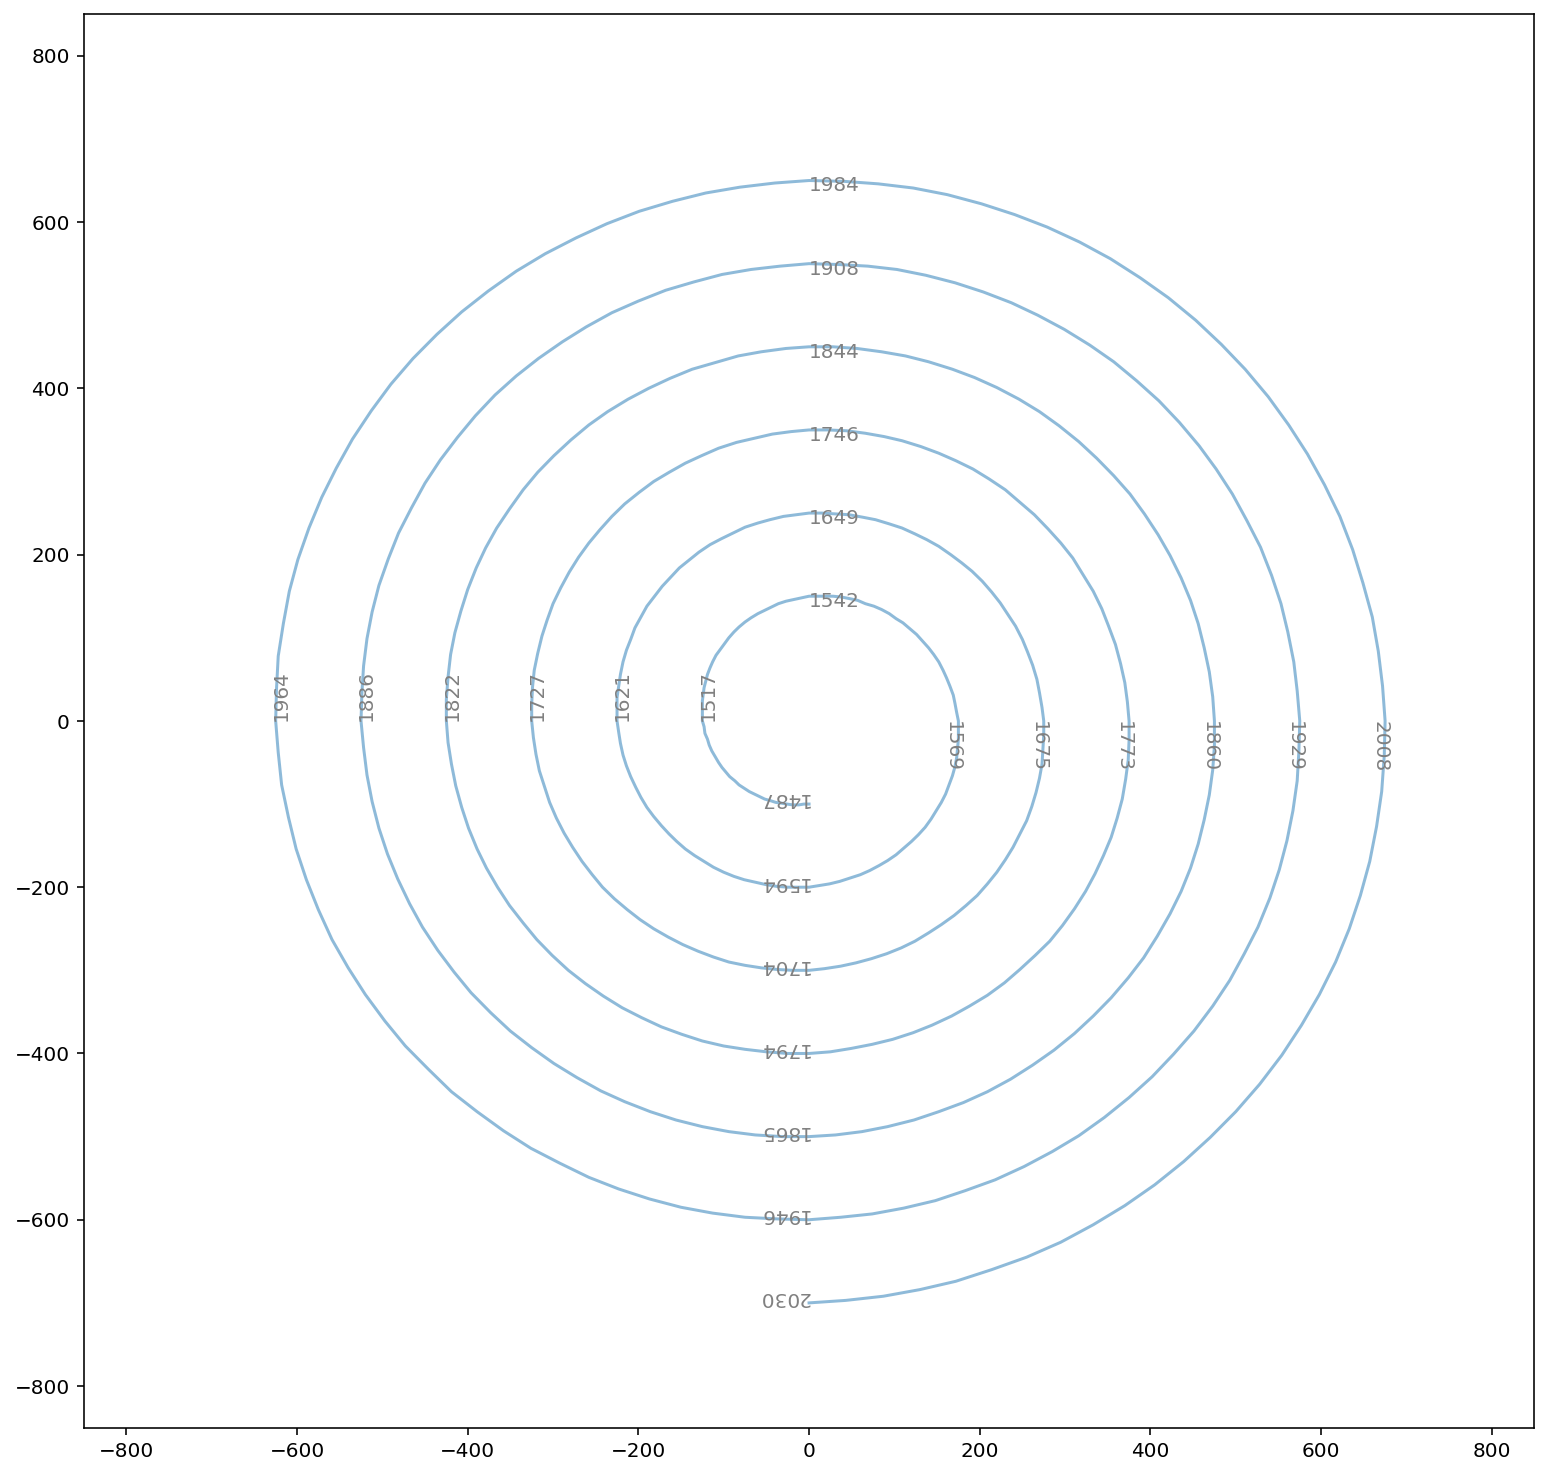

In [14]:

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, autoscale_on=False)
ax.set_xlim(-850, 850)
ax.set_ylim(-850, 850)
xy_list = shu.create_xy_list(ccw_history_radius_dict)

PathCollection_obj = plt.plot([x[0] for x in xy_list], [y[1] for y in xy_list], alpha=0.5)
years_list = turnings_df['turning_year_begin'].tolist() + [turnings_df['turning_year_end'].max()+1]
shu.add_spiral_labels(sorted(years_list), ccw_history_year_dict)

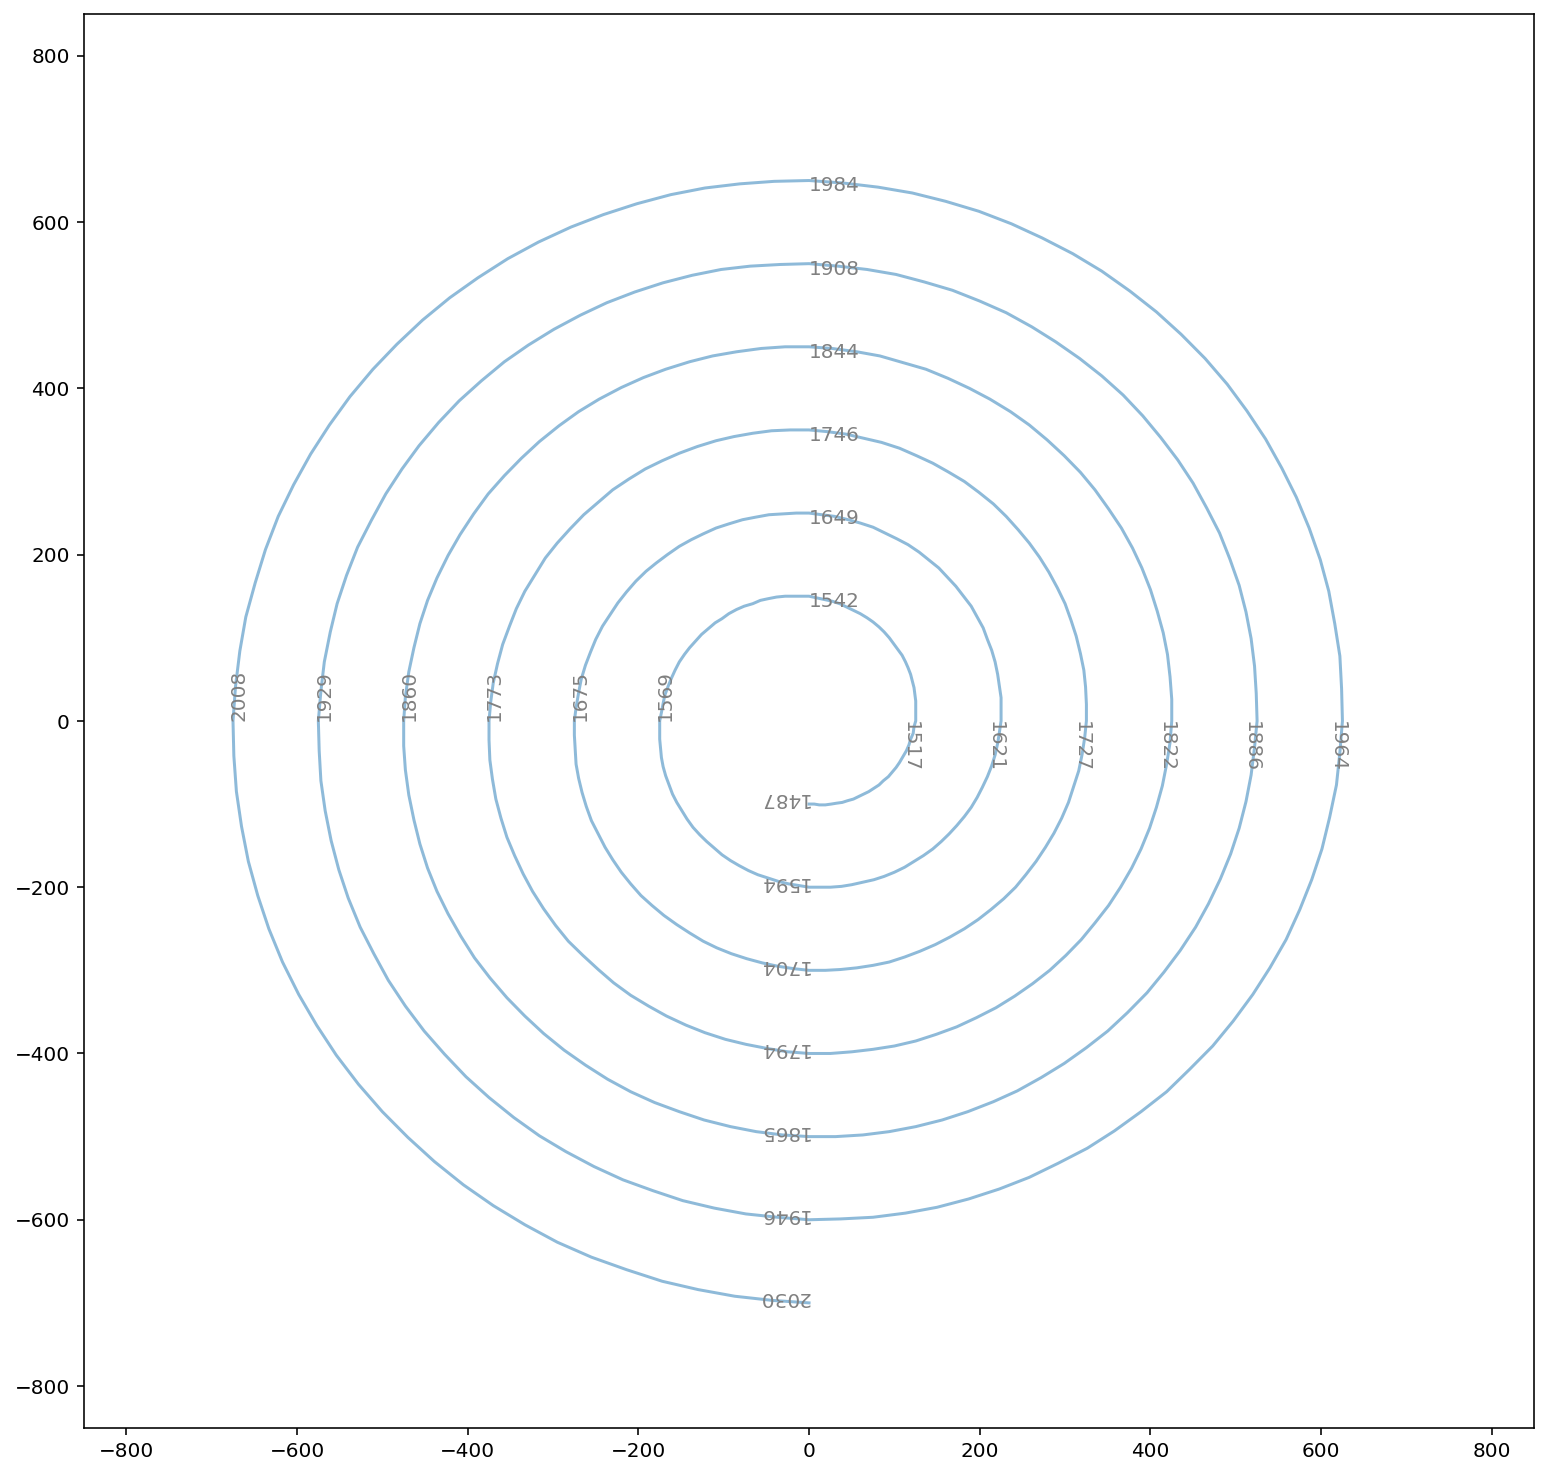

In [15]:

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, autoscale_on=False)
ax.set_xlim(-850, 850)
ax.set_ylim(-850, 850)
xy_list = shu.create_xy_list(cw_history_radius_dict)

PathCollection_obj = plt.plot([x[0] for x in xy_list], [y[1] for y in xy_list], alpha=0.5)
years_list = turnings_df['turning_year_begin'].tolist() + [turnings_df['turning_year_end'].max()+1]
shu.add_spiral_labels(sorted(years_list), cw_history_year_dict)

In [ ]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

In [ ]:
# %load ../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
html_str = 'Click <a href="{}" target="_blank">here</a> to view notebook in nbviewer.'
HTML(html_str.format(notebook_viewer_url))